This shows the way the target changes over the column values for different frequecies. In the graphs on the left we use a rolling window for each frequency. But this is misleading, because the range (of column values) represented by the 5000 points in the windows is different for each frequency. For frequencies where the data is sparse it will be much wider. We can get a more accurate picture by using the same rolling window for all frequencies as in the graphs on the right.

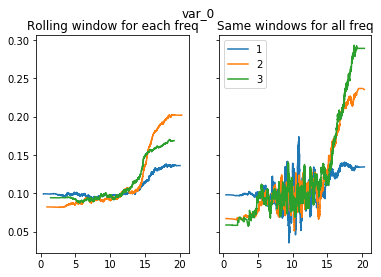

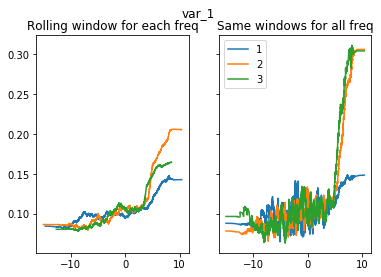

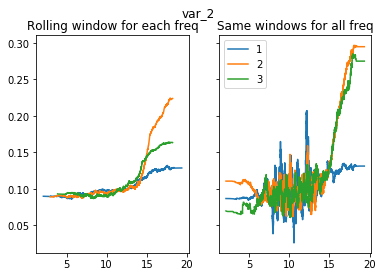

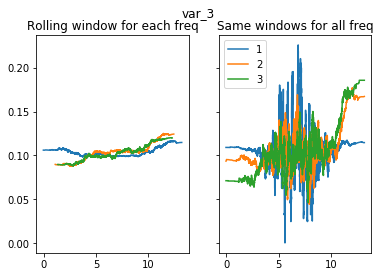

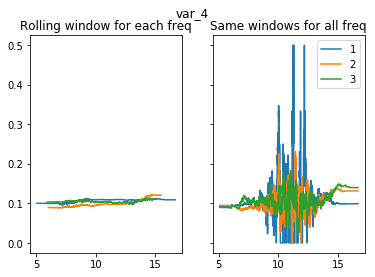

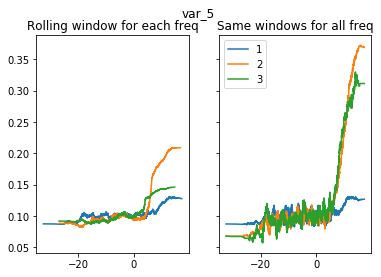

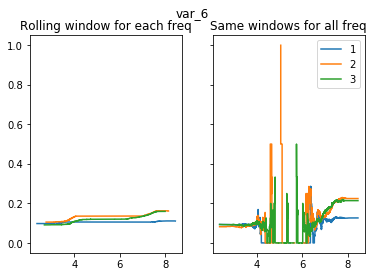

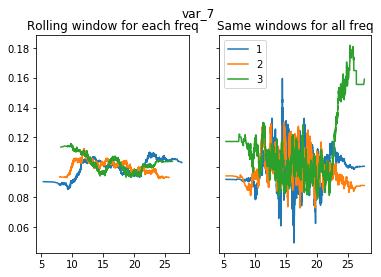

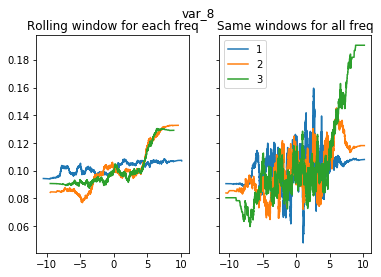

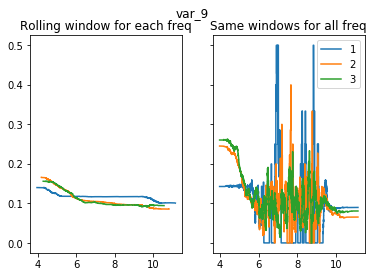

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# read input
train = pd.read_csv(os.path.join('..', 'input', 'train.csv'))
test = pd.read_csv(os.path.join('..', 'input', 'test.csv'))
all_data = pd.concat([train, test], axis=0, sort=False)


for i in range(10):
    col = 'var_' + str(i)

    size = all_data.groupby(col)['target'].size().to_frame('size' + col)
    train.drop('size' + col, axis=1, inplace=True, errors='ignore')
    train = pd.merge(train, size, 'left', left_on=col, right_index=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    for s in [1, 2, 3]:
        col_copy = train.loc[train['size' + col] == s, [col, 'target']].copy()
        col_copy.sort_values(col, inplace=True)
        rm = col_copy['target'].rolling(window=5000, min_periods=1, center=True).mean()
        ax1.plot(col_copy[col].values, rm.values)
        ax1.set_title('Rolling window for each freq')
    col_min = train[col].min()
    col_max = train[col].max()
    bins = np.arange(col_min, col_max, (col_max - col_min)/10)
    bin_mid = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]

    for s in [1, 2, 3]:
        col_copy = train[[col, 'size' + col, 'target']].copy()
        col_copy.loc[col_copy['size' + col] != s, 'target'] = np.nan
        col_copy.sort_values(col, inplace=True)
        rm = col_copy['target'].rolling(window=5000, min_periods=1, center=True).mean()
        ax2.plot(col_copy[col].values, rm.values)
        ax2.set_title('Same windows for all freq')
    fig.suptitle(col)
    plt.legend([1, 2, 3])
    plt.show()
